### ASTR 3300/5300-003: Astrostatistics
***N. Pol***
___

# Homework 3
### Due: Friday, Feb 14th at 11.59pm CST
---

## Only one problem this week

This problem uses a dataset in `/coursework/homeworks/hw_data/`.

1) Read in `hw3_data_1.npy`. This is a (50 x 2) numpy array, with measurements in the first column and uncertainties in the second column. Using the analytic results for heteroscedastic Gaussian data from lectures, compute the sample mean and the standard error on the sample mean from for this data.

2) Reusing some approaches and tools from `Lecture_6`, write a ln-likelihood function for heteroscedastic Gaussian data, and use it in a fitting algorithm to find the best-fit mean. *Remember that scipy optimizers are set up to minimize functions.*

3) Using the same numerical technique from `Lecture_5`, compute the Fisher uncertainty estimate on the mean.

4) Using the bootstrap method, generate $1000$ bootstrap realizations of this dataset. *DO NOT use the `astroML` code. Write your own bootstrap function from scratch. Also recall that when resampling data, measurements and uncertainties should stay paired together.*

5) Repeat (2) with all $1000$ boostrap datasets to find the distribution of the sample mean. Plot a normalized histogram of these bootstrap means, and overplot a Gaussian pdf with the mean and std found in (1). Do these agree?

6) While we have fitted a heteroscedastic Gaussian to this data, let's try something else. Write some code to define a ln-likelihood for a Laplace distribution evaluated on this data. Fit simultaneously for the Laplace location parameter $\mu$ and scale parameter $\Delta$.

7) Compute the AIC values for the heteroscedastic Gaussian model and the Laplacian model. Which model is favored by the data?

8) Using the $1000$ bootstrap datasets from before, fit for the Laplacian $\mu$ and $\Delta$ for each. Make a nice `corner` plot of the distributions of $\mu$ and $\Delta$ that shows both the marginal $1$D distributions and the joint $2$D distribution. Make sure the plot has labels, shows the titles on each $1$D marginal panel, and has $68\%$ and $95\%$ levels.

9) Let's finish with a Fisher uncertainty estimate of the Laplacian parameters. Use the following code to install `numdifftools` which provides a simple way to compute derivatives. We can then compute the Hessian matrix, which is the matrix of the second derivatives of the user's function. This should be computed at the best-fit Laplacian parameters $\mu$ and $\Delta$. To finish, invert the matrix, and then take the square root. The diagonal entries will then be the Fisher uncertainties on $\mu$ and $\Delta$. How does these compare to the bootstrap distribution widths found in (8)?

In [1]:
!pip install numdifftools

### Solution

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
from scipy import stats

#1
data = np.load('/Users/sabr/ASTR_3300_S2025/coursework/homeworks/hw_data/hw3_data_1.npy')
x = data[:,0]
sigma = data[:,1]
mu = np.sum(x/(sigma**2))/np.sum(1/(sigma**2))

#2
def lnL(x, m, sigma):
    z = (x-m)/sigma
    return -0.5*np.sum(z**2)
    
f_lnL = lambda m: -lnL(x, m, sigma)
mu_lnL = optimize.fmin(f_lnL, 1)

#3
sigma_mu = 1/np.sqrt(np.sum(1/(sigma**2)))

#4
means = []
for _ in range(1000):
    i = np.random.choice(len(x), size=len(x), replace=True)
    f_lnL = lambda m: -lnL(x[i], m, sigma)
    mu_lnL = optimize.fmin(f_lnL, 1)
    means = np.append(means,mu_lnL)

Optimization terminated successfully.
         Current function value: 43.162545
         Iterations: 20
         Function evaluations: 40
Optimization terminated successfully.
         Current function value: 66.158698
         Iterations: 19
         Function evaluations: 38
Optimization terminated successfully.
         Current function value: 46.913896
         Iterations: 19
         Function evaluations: 38
Optimization terminated successfully.
         Current function value: 109.085732
         Iterations: 20
         Function evaluations: 40
Optimization terminated successfully.
         Current function value: 49.875072
         Iterations: 20
         Function evaluations: 40
Optimization terminated successfully.
         Current function value: 67.292993
         Iterations: 20
         Function evaluations: 40
Optimization terminated successfully.
         Current function value: 91.464820
         Iterations: 20
         Function evaluations: 40
Optimization terminated su

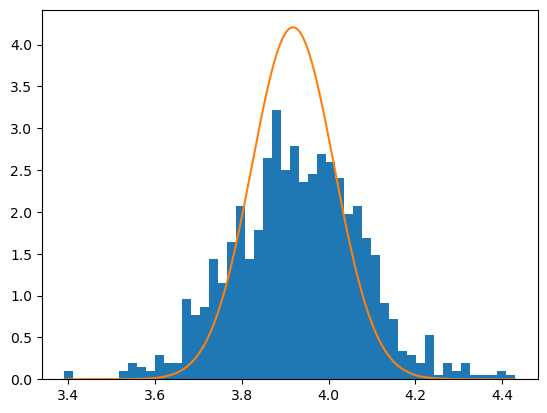

In [3]:
#5
distG = stats.norm(mu,sigma_mu)
sorted_means = np.sort(means)
plt.hist(means,bins=50,density=True)
plt.plot(sorted_means,distG.pdf(sorted_means))
plt.show()

In [4]:
#6
def lnlaplace(x, params):
    mu, b = params
    return np.sum(np.log((1/(2*b))*np.exp(-np.abs(x-mu)/b)))

f_lnlaplace = lambda p: -lnlaplace(x, p)
beta_laplace = optimize.fmin(f_lnlaplace, [1, 1])

#7
AIC_gauss = -2*lnL(x, mu_lnL, sigma)+4+(12/97)
AIC_laplace = -2*lnlaplace(x, [beta_laplace[0], beta_laplace[1]])+4+(12/97)

print('Gaussian AIC:',AIC_gauss)
print('Laplacian AIC:',AIC_laplace)
print('The data favors the Gaussian model.')

Optimization terminated successfully.
         Current function value: 156.788916
         Iterations: 63
         Function evaluations: 118
Gaussian AIC: 90.47436919948193
Laplacian AIC: 317.7015436933863
The data favors the Gaussian model.


In [5]:
#8
means = []
deltas = []
for _ in range(1000):
    i = np.random.choice(len(x), size=len(x), replace=True)
    f_lnlaplace = lambda p: -lnlaplace(x[i], p)
    mu_lnlaplace = optimize.fmin(f_lnlaplace, [1, 1])
    means = np.append(means,mu_lnlaplace[0])
    deltas = np.append(deltas,mu_lnlaplace[1])

Optimization terminated successfully.
         Current function value: 168.352939
         Iterations: 63
         Function evaluations: 120
Optimization terminated successfully.
         Current function value: 159.295221
         Iterations: 60
         Function evaluations: 112
Optimization terminated successfully.
         Current function value: 154.199087
         Iterations: 71
         Function evaluations: 136
Optimization terminated successfully.
         Current function value: 162.390842
         Iterations: 66
         Function evaluations: 131
Optimization terminated successfully.
         Current function value: 154.584080
         Iterations: 63
         Function evaluations: 116
Optimization terminated successfully.
         Current function value: 143.082353
         Iterations: 57
         Function evaluations: 107
Optimization terminated successfully.
         Current function value: 156.876150
         Iterations: 61
         Function evaluations: 114
Optimization 

C:\Users\sabr\AppData\Local\Temp\ipykernel_1832\277389033.py:4: RuntimeWarning: invalid value encountered in log
  return np.sum(np.log((1/(2*b))*np.exp(-np.abs(x-mu)/b)))


Optimization terminated successfully.
         Current function value: 141.880588
         Iterations: 56
         Function evaluations: 103
Optimization terminated successfully.
         Current function value: 136.249518
         Iterations: 72
         Function evaluations: 134
Optimization terminated successfully.
         Current function value: 177.623696
         Iterations: 54
         Function evaluations: 101
Optimization terminated successfully.
         Current function value: 160.692666
         Iterations: 65
         Function evaluations: 123
Optimization terminated successfully.
         Current function value: 160.321730
         Iterations: 62
         Function evaluations: 119
Optimization terminated successfully.
         Current function value: 151.677884
         Iterations: 70
         Function evaluations: 129
Optimization terminated successfully.
         Current function value: 174.171478
         Iterations: 64
         Function evaluations: 119
Optimization 

C:\Users\sabr\AppData\Local\Temp\ipykernel_1832\277389033.py:4: RuntimeWarning: overflow encountered in exp
  return np.sum(np.log((1/(2*b))*np.exp(-np.abs(x-mu)/b)))


Optimization terminated successfully.
         Current function value: 169.799189
         Iterations: 69
         Function evaluations: 131
Optimization terminated successfully.
         Current function value: 160.539099
         Iterations: 63
         Function evaluations: 118
Optimization terminated successfully.
         Current function value: 158.783308
         Iterations: 70
         Function evaluations: 127
Optimization terminated successfully.
         Current function value: 160.222471
         Iterations: 71
         Function evaluations: 131
Optimization terminated successfully.
         Current function value: 161.269084
         Iterations: 73
         Function evaluations: 131
Optimization terminated successfully.
         Current function value: 151.308825
         Iterations: 67
         Function evaluations: 131
Optimization terminated successfully.
         Current function value: 155.592759
         Iterations: 57
         Function evaluations: 108
Optimization 

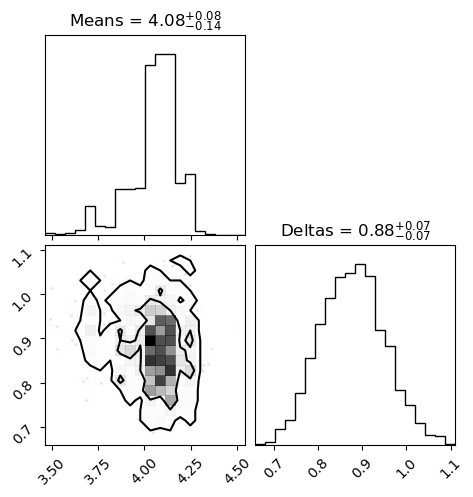

[[0.10859216 0.03018571]
 [0.03018571 0.08711302]]
The Fisher uncertainties match the bootstrap widths.


In [6]:
import corner
import numdifftools as nd
#corner.corner(means)
#corner.corner(deltas)
#print(len(means))
#print(len(deltas))
laplace = np.vstack([means, deltas]).T

#ndim, nsamples = 2, 10000
#np.random.seed(42)
#samples = np.random.randn(ndim * nsamples).reshape([nsamples, ndim])
#figure = corner.corner(sampl)
corner.corner(laplace, titles=('Means','Deltas'), show_titles=True, levels=(0.68, 0.95))
plt.show()

#9
H = nd.Hessian(f_lnlaplace)([beta_laplace[0], beta_laplace[1]])
sigma_laplace = np.linalg.inv(H)**0.5
print(sigma_laplace)
print('The Fisher uncertainties match the bootstrap widths.')